In [43]:
# Here are the libraries I am using
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from os import path
import json
import csv
import twitter
from datetime import datetime
from datetime import date

In [44]:
from __future__ import print_function, division
import time

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV 

In [46]:
t0 = time.time()
df_o= pd.read_csv('out+gephi+senti.csv')
print("%.2f secs ==> pd.read_csv"%(time.time()-t0))

0.04 secs ==> pd.read_csv


In [47]:
#remove all the rows that contain a missing value
df = df_o.dropna()

In [48]:
df.head(5)

screen_name    RT_pos    RT_neg  negative  positive  device_count_10  \
0           Termy  0.825651  0.174349  0.113927  0.886073              190   
1   JamesWrightLD  0.134728  0.865272  0.333674  0.666326              160   
2   WilliamPHDyer  0.050066  0.949934  0.342651  0.657349              150   
3  DanielZeichner  0.044858  0.955142  0.208419  0.791581              150   
4    robertcourts  0.309936  0.690064  0.384357  0.615643              150   

   device_count   fav_avg  fav_max    fav_std          ...           \
0            19  0.162014       17   0.645834          ...            
1            16  1.241700       71   4.302939          ...            
2            15  0.654066       57   2.880500          ...            
3            15  6.086156     1971  40.754446          ...            
4            15  2.134590      418  15.292917          ...            

   betweenesscentrality  modularity_class  pageranks  Authority       Hub  \
0                  21.5                 5   0.000054   0.000064  0.000091   
1                   0.0                 5   0.000151   0.001088  0.000000   
2                   0.0                 5   0.000054   0.000007  0.000000   
3                   0.0               104   0.000057   0.000027  0.000000   
4                   0.0                 6   0.000065   0.000128  0.000000   

   componentnumber  strongcompnum  clustering  eigencentrality  \
0                0              6         0.0         0.019966   
1                0              5         0.0         0.218031   
2                0              4         0.0         0.015587   
3                0              3         0.0         0.021348   
4                0              2         0.0         0.030759   

   eigencentrality-1000  
0                19.966  
1               218.031  
2                15.587  
3                21.348  
4                30.759  

[5 rows x 43 columns]

In [27]:
#Stratified sampling method by the value of Stance
def split_to_train_test(df, label_column, frac=0.7):
    train_df, val_df = pd.DataFrame(), pd.DataFrame()
    labels = df[label_column].unique()
    for lbl in labels:
        lbl_df = df[df[label_column] == lbl]
        lbl_train_df = lbl_df.sample(frac=frac)
        lbl_val_df = lbl_df.drop(lbl_train_df.index)
        print ('\n%s:\n----\ntotal:%d\ntrain_df:%d\nval_df:%d' % (lbl, len(lbl_df), len(lbl_train_df), len(lbl_val_df)))
        train_df = train_df.append(lbl_train_df)
        val_df = val_df.append(lbl_val_df)

    return train_df, val_df



In [88]:
print('After staratified sampling, get two sets: training subset and validation subset')
train, val = split_to_train_test(df, 'eleted', 0.9)

After staratified sampling, get two sets: training subset and validation subset

0:
----
total:1205
train_df:1084
val_df:121

1:
----
total:410
train_df:369
val_df:41


In [89]:
train.head(5)

screen_name    RT_pos    RT_neg  negative  positive  device_count_10  \
1293   JohnFisher_1  0.781843  0.218157  0.193058  0.806942               20   
1274  friarparkward  0.211085  0.788915  0.016893  0.983107               30   
971     LNethsingha  0.307733  0.692267  0.170332  0.829668               40   
1318      ShakaLish  0.062624  0.937376  0.224872  0.775128               20   
985   ClaireHiscott  0.024469  0.975531  0.212836  0.787164               40   

      device_count   fav_avg  fav_max   fav_std          ...           \
1293             2  0.223301       14  1.023340          ...            
1274             3  0.241993        4  0.618644          ...            
971              4  0.640078       20  2.039691          ...            
1318             2  1.000000       29  2.516799          ...            
985              4  0.635417       54  2.377498          ...            

      betweenesscentrality  modularity_class  pageranks  Authority  Hub  \
1293                   0.0                57   0.000047   0.008437  0.0   
1274                   0.0                43   0.000050   0.000009  0.0   
971                    0.0                63   0.000048   0.006763  0.0   
1318                   0.0                57   0.000047   0.008437  0.0   
985                    0.0               124   0.000058   0.016814  0.0   

      componentnumber  strongcompnum  clustering  eigencentrality  \
1293                0            516         0.0         0.017855   
1274                0           1541         0.0         0.005761   
971                 0           1202         0.0         0.005761   
1318                0            472         0.0         0.017855   
985                 0           1176         0.0         0.045516   

      eigencentrality-1000  
1293                17.855  
1274                 5.761  
971                  5.761  
1318                17.855  
985                 45.516  

[5 rows x 43 columns]

In [90]:
val.head(5)

screen_name    RT_pos    RT_neg  negative  positive  device_count_10  \
9        joerichards  0.185449  0.814551  0.087266  0.912734              130   
16   JudithBuntingLD  0.015496  0.984504  0.052248  0.947752              120   
93      LouiseEllman  0.055071  0.944929  0.046519  0.953481               90   
111     NigelQuinton  0.121316  0.878684  0.087520  0.912480               90   
124     IvanLewis_MP  0.068080  0.931920  0.006298  0.993702               80   

     device_count    fav_avg  fav_max    fav_std          ...           \
9              13   1.986979      719  26.099017          ...            
16             12   1.663848      300   7.704787          ...            
93              9  14.759563      507  45.172857          ...            
111             9   0.384075       31   1.819110          ...            
124             8   4.800094      257  12.431600          ...            

     betweenesscentrality  modularity_class  pageranks  Authority  Hub  \
9                     0.0                22   0.000047   0.000082  0.0   
16                    0.0                22   0.000047   0.000082  0.0   
93                    0.0                56   0.000047   0.001094  0.0   
111                   0.0                56   0.000080   0.009714  0.0   
124                   0.0                56   0.000047   0.001094  0.0   

     componentnumber  strongcompnum  clustering  eigencentrality  \
9                  0             52         0.0         0.005761   
16                 0             45         0.0         0.005761   
93                 0            179         0.0         0.005761   
111                0            161         0.0         0.123944   
124                0            148         0.0         0.005761   

     eigencentrality-1000  
9                   5.761  
16                  5.761  
93                  5.761  
111               123.944  
124                 5.761  

[5 rows x 43 columns]

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [92]:
#only inclued behavior features
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = cross_val_predict(clf, X_val, y_val, cv=10)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.85      0.89      0.87       121
          1       0.63      0.54      0.58        41

avg / total       0.79      0.80      0.80       162



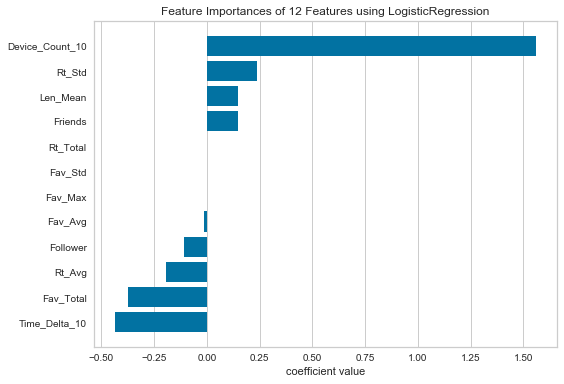

In [93]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [94]:
#only inclued network features
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ["indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class", "componentnumber", "strongcompnum", 
           "clustering", "eigencentrality-1000"]


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = cross_val_predict(clf, X_val, y_val, cv=10)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.87      0.88      0.88       121
          1       0.64      0.61      0.62        41

avg / total       0.81      0.81      0.81       162



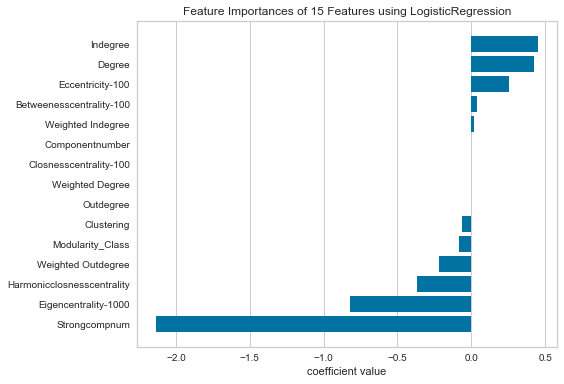

In [30]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [95]:
#only included sentiment features
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ['RT_pos','RT_neg','negative','positive']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = clf.fit(X_train, y_train).predict(X_val)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.75      1.00      0.86       121
          1       0.00      0.00      0.00        41

avg / total       0.56      0.75      0.64       162



/Users/wanghan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


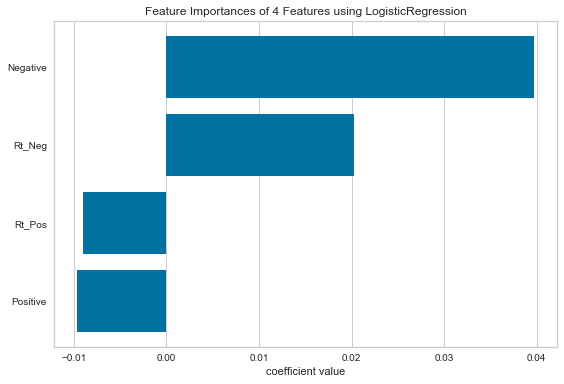

In [32]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [125]:
#inclued behavior + network features decision tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = tree.DecisionTreeClassifier()


features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends',"indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class", ]


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = cross_val_predict(clf, X_val, y_val, cv=10)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.85      0.83      0.84       121
          1       0.52      0.56      0.54        41

avg / total       0.77      0.76      0.76       162



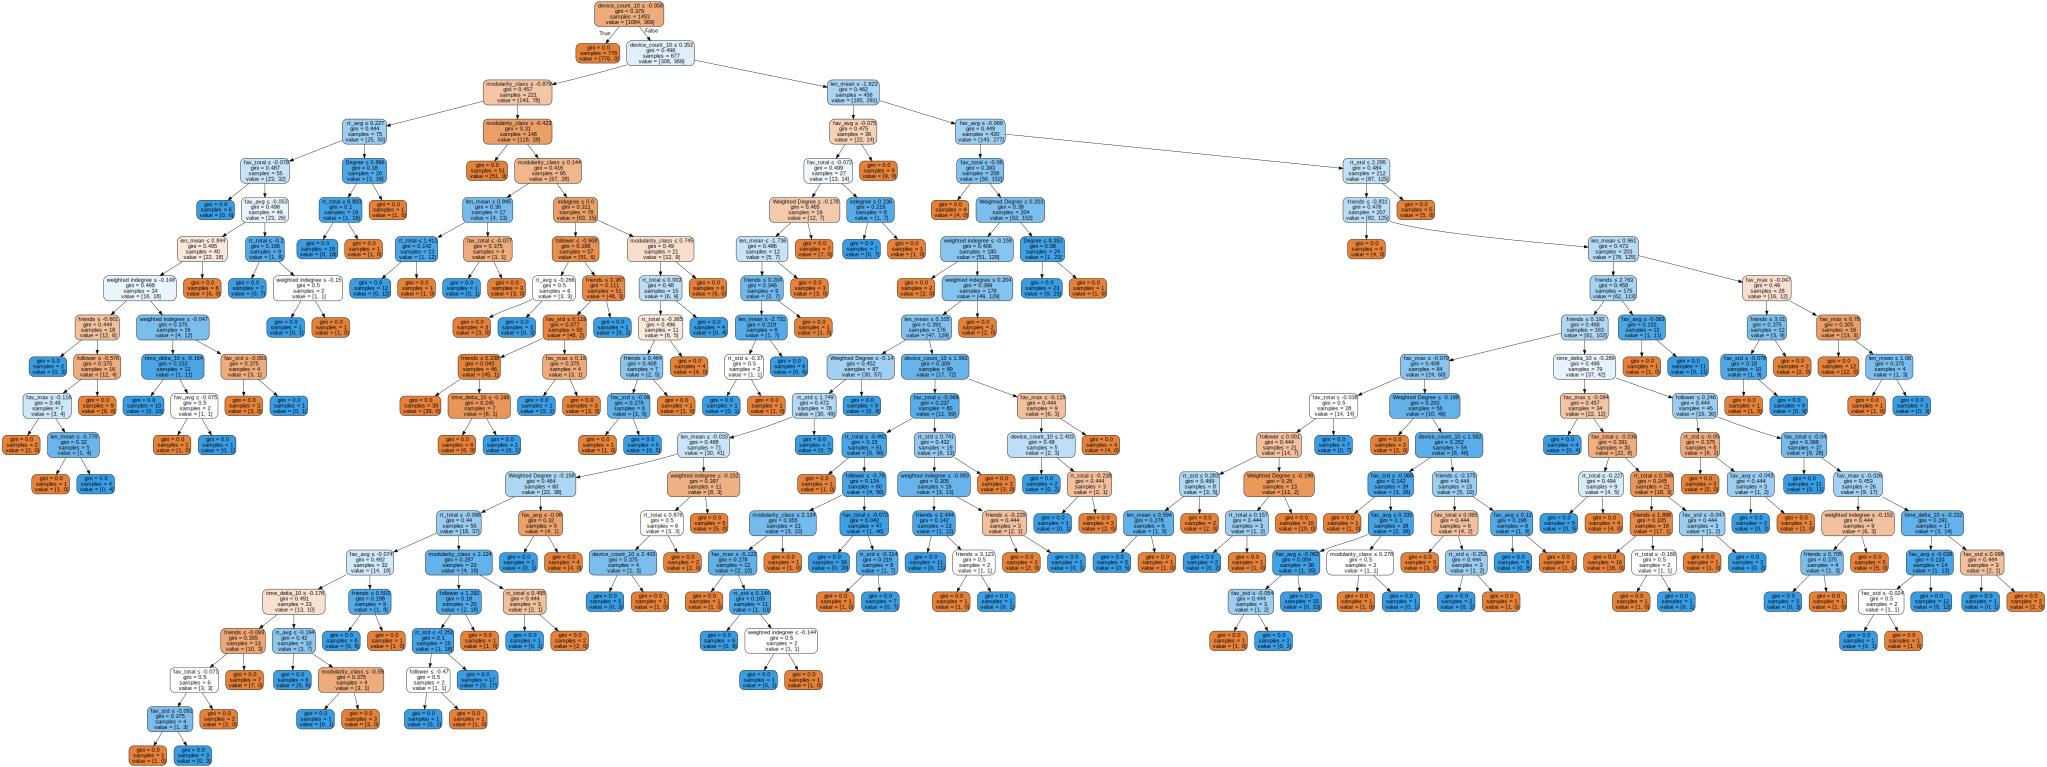

In [12]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=features,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

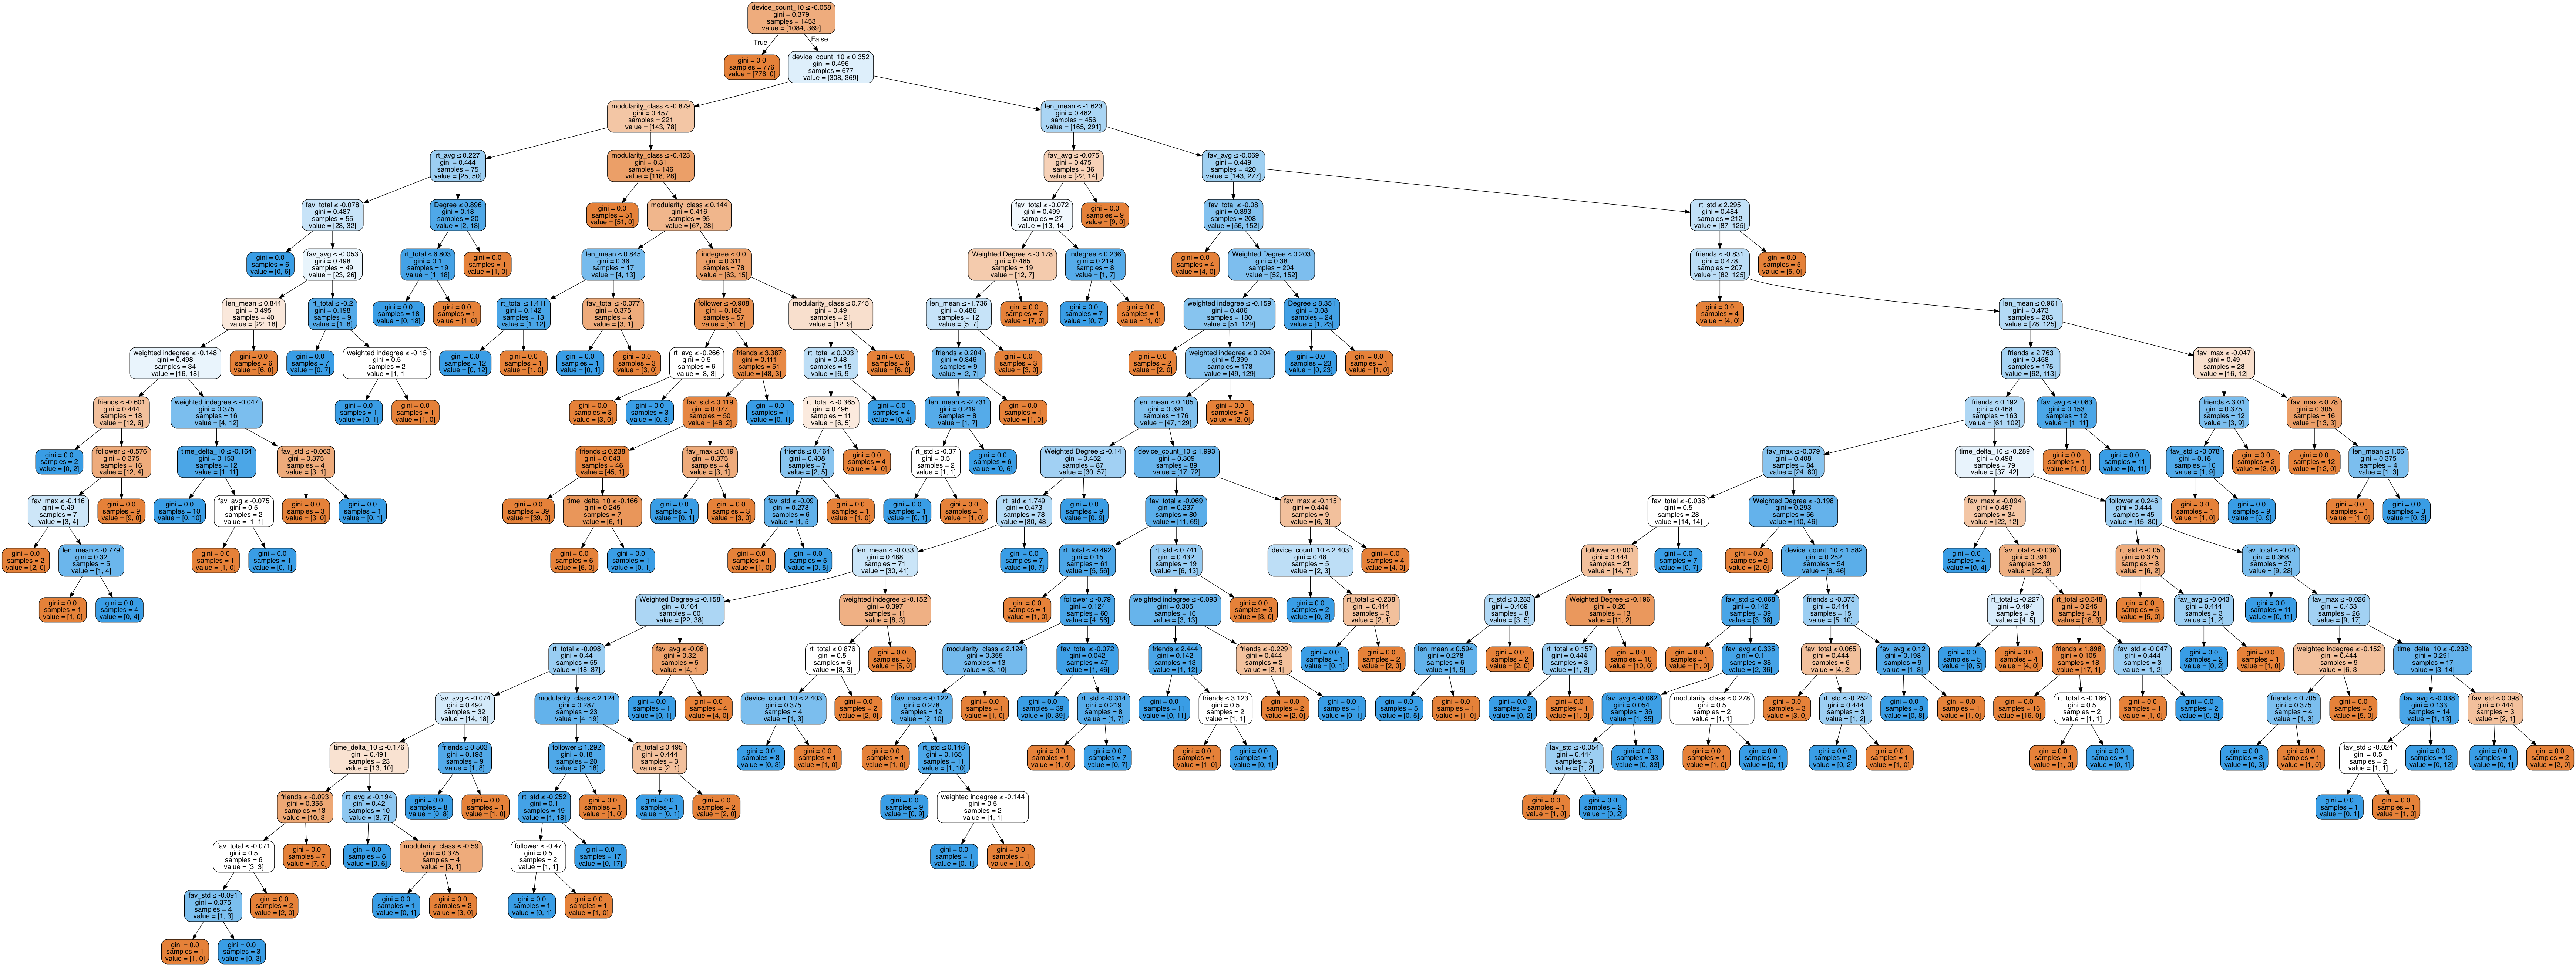

In [13]:
from IPython.display import Image 
import pydotplus 
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [126]:
#behavior +network _lr
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends',"indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class", ]


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = clf.fit(X_train, y_train).predict(X_val)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89       121
          1       0.72      0.51      0.60        41

avg / total       0.82      0.83      0.82       162



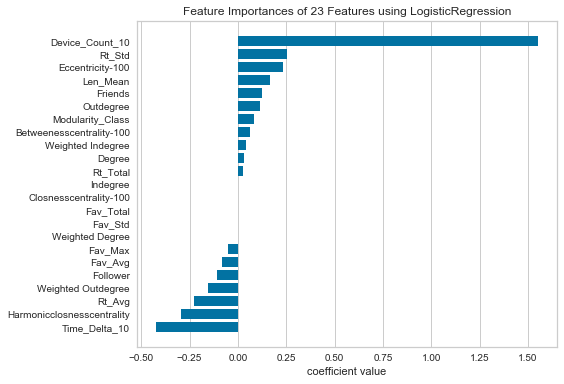

In [15]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [129]:
#behavior + sentiment features
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends', 'RT_pos','RT_neg','negative','positive']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = clf.fit(X_train, y_train).predict(X_val)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89       121
          1       0.72      0.51      0.60        41

avg / total       0.82      0.83      0.82       162



In [128]:
#network + sentiment features 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ["indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class", "componentnumber", "strongcompnum", 
           "clustering", "eigencentrality-1000",'RT_pos','RT_neg','negative','positive']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)
 
y_val_predict = clf.fit(X_train, y_train).predict(X_val)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.88      0.88      0.88       121
          1       0.66      0.66      0.66        41

avg / total       0.83      0.83      0.83       162



In [108]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

In [136]:
#added three groups of features
parameters = {  
    'penalty':('l1', 'l2'),   
    'C':[1,2,3,4],   
} 

def preprocess(df, features):
    X = df[features].values
    
    X = scaler.fit_transform(X)
    return X

scaler = StandardScaler()

clf = LogisticRegression(penalty='l1')


features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends', "indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class", "componentnumber", "strongcompnum", 
           "clustering", "eigencentrality-1000", 'RT_pos','RT_neg','negative','positive']


y_train = train['eleted'].values
y_val = val['eleted'].values

X_train = preprocess(train, features)
X_val = preprocess(val, features)

y_val_predict = cross_val_predict(clf, X_val, y_val, cv=10)
print(classification_report(y_val, y_val_predict))

             precision    recall  f1-score   support

          0       0.86      0.88      0.87       121
          1       0.63      0.59      0.61        41

avg / total       0.80      0.81      0.81       162



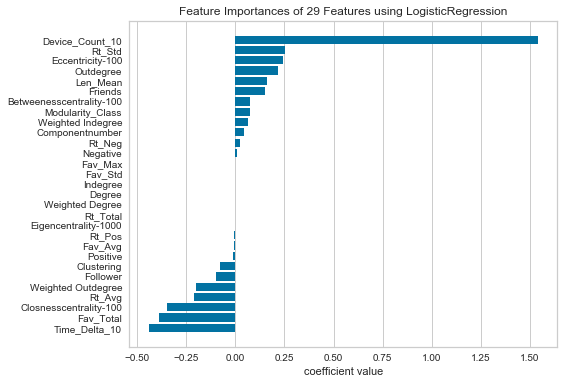

In [135]:
from yellowbrick.features.importances import FeatureImportances
# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [51]:
#print the feature importance

print(clf.coef_)

[[-0.15399704  0.          0.09423217  0.         -0.4518969   0.10300383
  -0.44891426  0.33133799  0.07780669 -1.01146905 -0.05470271  0.12241931
   0.61973026  0.          0.46422187  0.1240574  -0.26581029  0.
   0.27730421 -0.23504465 -0.1395317   0.03220773 -0.09415635 -0.32803582
   0.          0.         -2.29033903 -0.06058114 -0.98026794]]


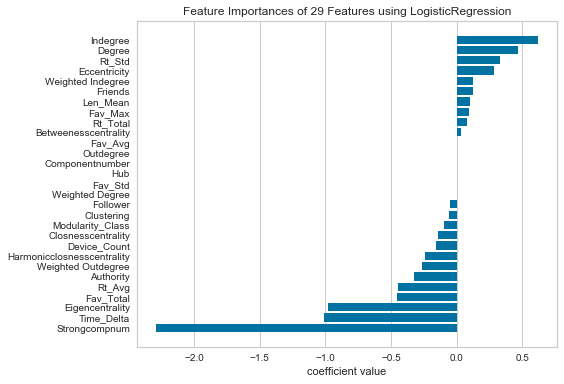

In [52]:
#plot the importance of feature
#yellowbrick 好用

import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from yellowbrick.features.importances import FeatureImportances

features = ['device_count_10', 'fav_avg', 'fav_max', 'fav_std',
            'fav_total', 'len_mean',  'rt_avg','rt_std','rt_total',
            'time_delta_10','follower','friends',"indegree","outdegree",
           "Degree","weighted indegree","weighted outdegree",
           "Weighted Degree", "Eccentricity-100","closnesscentrality-100",
           "harmonicclosnesscentrality", "betweenesscentrality-100",
           "modularity_class",'RT_pos','RT_neg','negative','positive']

# Create a new figure
fig = plt.figure()
ax = fig.add_subplot()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(clf, ax=ax, labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.poof()

In [1]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.neighbors import NearestCentroid
from sklearn.feature_selection import SelectFromModel

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [16]:
names = ["Logistic Regression", "Linear SVC", "LinearSVC with L1-based feature selection","Multinomial NB", 
         "Bernoulli NB", "Ridge Classifier", "AdaBoost", "Perceptron","Passive-Aggresive", "Nearest Centroid"]
classifiers = [
    LogisticRegression(),
    LinearSVC(),
    Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False))),
  ('classification', LinearSVC(penalty="l2"))]),
    MultinomialNB(),
    BernoulliNB(),
    RidgeClassifier(),
    AdaBoostClassifier(),
    Perceptron(),
    PassiveAggressiveClassifier(),
    NearestCentroid()
    ]
zipped_clf = zip(names,classifiers)


In [27]:
clf2 = LinearSVC()

y_val_predict = clf2.fit(X_train, y_train).predict(X_val)
print("LinearSVC classifier")
print(classification_report(y_val, y_val_predict))

LinearSVC classifier
             precision    recall  f1-score   support

          0       0.88      0.88      0.88       121
          1       0.63      0.63      0.63        41

avg / total       0.81      0.81      0.81       162



In [29]:
clf3=LinearSVC(penalty="l1", dual=False)
y_val_predict = clf3.fit(X_train, y_train).predict(X_val)
print("LinearSVC(L1, dual=False) classifier")
print(classification_report(y_val, y_val_predict))

LinearSVC(L1, dual=False) classifier
             precision    recall  f1-score   support

          0       0.87      0.88      0.87       121
          1       0.62      0.61      0.62        41

avg / total       0.81      0.81      0.81       162



In [30]:
clf4=LinearSVC(penalty="l2")
y_val_predict = clf4.fit(X_train, y_train).predict(X_val)
print("LinearSVC(L2, dual=False) classifier")
print(classification_report(y_val, y_val_predict))

LinearSVC(L2, dual=False) classifier
             precision    recall  f1-score   support

          0       0.88      0.88      0.88       121
          1       0.63      0.63      0.63        41

avg / total       0.81      0.81      0.81       162



In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_val_predict = gnb.fit(X_train, y_train).predict(X_val)
print("GaussianNB() classifier")
print(classification_report(y_val, y_val_predict))

GaussianNB() classifier
             precision    recall  f1-score   support

          0       0.86      0.74      0.80       121
          1       0.46      0.63      0.53        41

avg / total       0.76      0.72      0.73       162



In [33]:
from sklearn import tree
clf6 = tree.DecisionTreeClassifier()
y_val_predict = clf6.fit(X_train, y_train).predict(X_val)
print("DecisionTreeClassifier() classifier")
print(classification_report(y_val, y_val_predict))

DecisionTreeClassifier() classifier
             precision    recall  f1-score   support

          0       0.86      0.88      0.87       121
          1       0.62      0.56      0.59        41

avg / total       0.80      0.80      0.80       162



In [34]:
from sklearn.ensemble import RandomForestClassifier
clf7 = RandomForestClassifier(n_estimators=10)
y_val_predict = clf7.fit(X_train, y_train).predict(X_val)
print("DecisionTreeClassifier() classifier")
print(classification_report(y_val, y_val_predict))

DecisionTreeClassifier() classifier
             precision    recall  f1-score   support

          0       0.77      0.94      0.85       121
          1       0.50      0.17      0.25        41

avg / total       0.70      0.75      0.70       162



In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

clf8 = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
y_val_predict = clf8.fit(X_train, y_train).predict(X_val)
print("ExtraTreesClassifier() classifier")
print(classification_report(y_val, y_val_predict))

DecisionTreeClassifier() classifier
             precision    recall  f1-score   support

          0       0.84      0.88      0.86       121
          1       0.59      0.49      0.53        41

avg / total       0.77      0.78      0.78       162



In [36]:
from sklearn.ensemble import AdaBoostClassifier
clf9 = AdaBoostClassifier(n_estimators=100)
y_val_predict = clf9.fit(X_train, y_train).predict(X_val)
print("AdaBoostClassifier() classifier")
print(classification_report(y_val, y_val_predict))

AdaBoostClassifier() classifier
             precision    recall  f1-score   support

          0       0.91      0.85      0.88       121
          1       0.63      0.76      0.69        41

avg / total       0.84      0.83      0.83       162



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

clf10 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_val_predict = clf10.fit(X_train, y_train).predict(X_val)
print("GradientBoostingClassifier() classifier")
print(classification_report(y_val, y_val_predict))

GradientBoostingClassifier() classifier
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       121
          1       0.62      0.78      0.69        41

avg / total       0.84      0.82      0.83       162



In [52]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = AdaBoostClassifier(n_estimators=100)
#clf3 = GaussianNB() ('gnb', clf3)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('lr', clf1), ('ada', clf2),('gdbt',clf4)], voting='soft')

params = {'lr__C': [1.0, 100.0], 'ada__n_estimators': [100, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid_pre = grid.fit(X_train, y_train).predict(X_val)
print("VotingClassifier()")
print(classification_report(y_val, grid_pre))


VotingClassifier()
             precision    recall  f1-score   support

          0       0.93      0.85      0.89       121
          1       0.65      0.80      0.72        41

avg / total       0.86      0.84      0.84       162



In [141]:
#adding weights 113
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = AdaBoostClassifier(n_estimators=100)
#clf3 = GaussianNB() ('gnb', clf3)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('lr', clf1), ('ada', clf2),('gdbt',clf4)], voting='soft',weights=[1, 1, 3])

params = {'lr__C': [1.0, 100.0], 'ada__n_estimators': [100, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid_pre = grid.fit(X_train, y_train).predict(X_val)
print("VotingClassifier()")
print(classification_report(y_val, grid_pre))


VotingClassifier()
             precision    recall  f1-score   support

          0       0.97      0.88      0.93       121
          1       0.73      0.93      0.82        41

avg / total       0.91      0.90      0.90       162



In [142]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=1)
clf2 = AdaBoostClassifier(n_estimators=100)
#clf3 = GaussianNB() ('gnb', clf3)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('lr', clf1), ('ada', clf2),('gdbt',clf4)], voting='soft',weights=[1, 3, 1])

params = {'lr__C': [1.0, 100.0], 'ada__n_estimators': [100, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
grid_pre = grid.fit(X_train, y_train).predict(X_val)
print("VotingClassifier()")
print(classification_report(y_val, grid_pre))

VotingClassifier()
             precision    recall  f1-score   support

          0       0.96      0.88      0.92       121
          1       0.71      0.90      0.80        41

avg / total       0.90      0.88      0.89       162



In [49]:
from xgboost import XGBClassifier
clf11 = XGBClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
y_val_predict = clf10.fit(X_train, y_train).predict(X_val)
print("XGBClassifier() classifier")
print(classification_report(y_val, y_val_predict))

XGBClassifier() classifier
             precision    recall  f1-score   support

          0       0.92      0.83      0.87       121
          1       0.62      0.78      0.69        41

avg / total       0.84      0.82      0.83       162



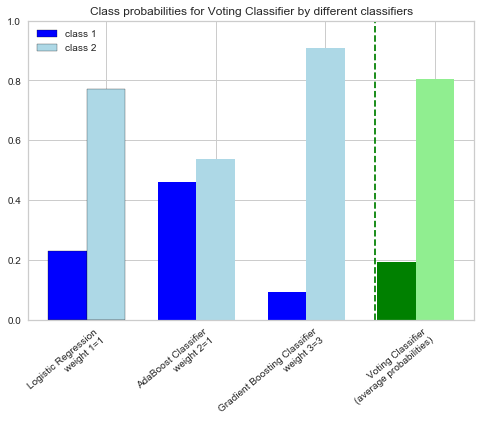

In [149]:

clf1 = LogisticRegression(random_state=1)
clf2 = AdaBoostClassifier(n_estimators=100)
clf4 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
eclf = VotingClassifier(estimators=[('lr', clf1), ('ada', clf2),('gdbt',clf4)], voting='soft',weights=[1, 1, 3])



# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_val) for c in (clf1, clf2, clf4, eclf)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]


# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='blue', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightblue', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='green', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='lightgreen', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='green', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['Logistic Regression\nweight 1=1',
                    'AdaBoost Classifier\nweight 2=1',
                    'Gradient Boosting Classifier\nweight 3=3',
                    'Voting Classifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for Voting Classifier by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()